In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [4]:
#Sanity check of city data
city_data_df.info()
city_data_df.isnull().sum()
# Get the data types of each column.
#city_data_df.dtypes

# Get the number of data points from the Urban cities.
print(sum(city_data_df["type"]=="Rural"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB
18


In [5]:
# Get the columns and the rows that are not null.
ride_data_df.count()

# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [6]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [7]:
# Create the city DataFrame for respective city type
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
urban_cities_df.head()
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [33]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [9]:
# Get average fare for each city type.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()
rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [10]:
# Get the average number of drivers for each city type.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

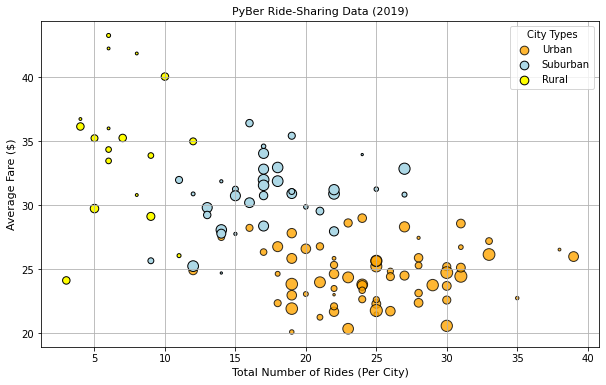

<Figure size 432x288 with 0 Axes>

In [11]:
#Create bubble chart for urban

# Urban cities creating x and y axis
x_axis_urban = urban_ride_count
y_axis_urban = urban_avg_fare

# Urban cities creating x and y axis
x_axis_suburban = suburban_ride_count
y_axis_suburban = suburban_avg_fare

x_axis_rural = rural_ride_count
y_axis_rural = rural_avg_fare

plt.subplots(figsize =(10,6))

plt.scatter(x_axis_urban, y_axis_urban, s= urban_driver_count*2, alpha = 0.8,color ='orange', edgecolors='k',linewidths=1, label = "Urban")
plt.scatter(x_axis_suburban, y_axis_suburban, s= suburban_driver_count*5, color ='lightblue', edgecolors='k',linewidths=1,label ="Suburban")
plt.scatter(x_axis_rural, y_axis_rural, s= rural_driver_count*8, color ='yellow', edgecolors='k',linewidths=1, label="Rural")
plt.legend()
#Adding labels and legends
plt.xlabel(xlabel="Total Number of Rides (Per City)", fontsize=11)
plt.ylabel(ylabel="Average Fare ($)", fontsize=11)
plt.title(label="PyBer Ride-Sharing Data (2019)", fontsize=11)

plt.grid(True)
#plt.grid( which='major', axis='both',color='r', linestyle='-', linewidth=2)

# Create a legend
lgnd = plt.legend(fontsize="10", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(10)

plt.show()

# Save the figure.
plt.savefig("analysis/Pyber_Data.png")

In [12]:
# Get summary statistics.
urban_ride_count.describe()
# Get summary statistics.
suburban_ride_count.describe()

rural_ride_count.describe()

# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

round(suburban_ride_count.mode(),2)


0    17
Name: ride_id, dtype: int64

In [13]:
#Numpy Mode, Mean and Median
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
mode_urban_ride_count
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
mode_urban_ride_count[0]

#Mode of suburban
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_suburban_ride_count

#Mode of rural
mode_rural_ride_count = sts.mode(rural_ride_count)
mode_rural_ride_count


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [14]:
#average fare in each city

avg_urban_fare = np.mean(urban_avg_fare)
avg_suburban_fare = np.mean(suburban_avg_fare)
avg_rural_fare = np.mean(rural_avg_fare)

print(f"The average fare for urban cities is {avg_urban_fare}.")
print(f"The average fare for suburban cities is {avg_suburban_fare}.")
print(f"The average fare for rural cities is {avg_rural_fare}.")

The average fare for urban cities is 24.499121716787847.
The average fare for suburban cities is 30.737298033475952.
The average fare for rural cities is 34.63776503126503.


In [15]:
# Get the driver count data from  each city type.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

avg_urban_driver_count = np.mean(urban_drivers)
avg_suburban_driver_count= np.mean(suburban_drivers)
avg_rural_driver_count = np.mean(rural_drivers)

print(f"The average driver count for urban cities is {avg_urban_driver_count}.")
print(f"The average driver count for suburban cities is {avg_suburban_driver_count}.")
print(f"The average driver count for rural cities is {avg_rural_driver_count}.")

The average driver count for urban cities is 36.67815384615385.
The average driver count for suburban cities is 13.712.
The average driver count for rural cities is 4.296.


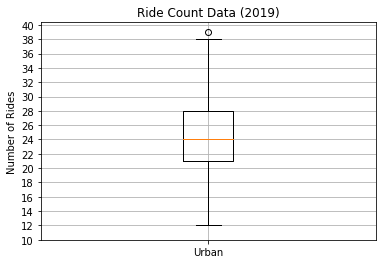

In [16]:
# Box-and-Whisker Plots for Ride Count Data

# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

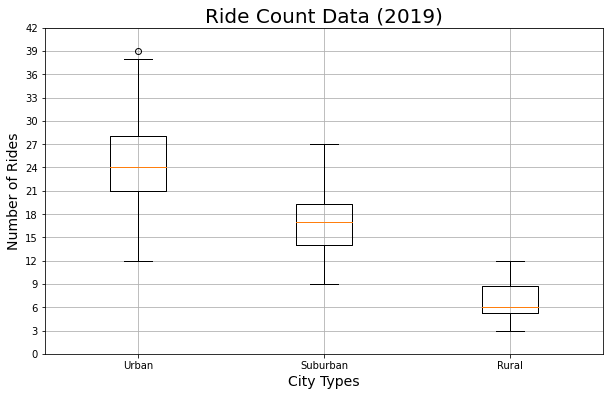

In [17]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [18]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


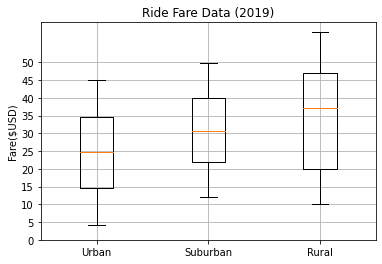

Summary Statistics


In [19]:
# Create a box-and-whisker plot for the urban fare data.

urban_fares = pyber_data_df[pyber_data_df["type"]=="Urban"]["fare"]
suburban_fares = pyber_data_df[pyber_data_df["type"]=="Suburban"]["fare"]
rural_fares = pyber_data_df[pyber_data_df["type"]=="Rural"]["fare"]

fare_data = [urban_fares, suburban_fares, rural_fares]

x_labels = ["Urban", "Suburban","Rural"]
xticks = ["Urban", "Suburban","Rural"]
fig, ax = plt.subplots()
ax.boxplot(fare_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.set_xticks(np.arange(1,4),xticks)
ax.invert_xaxis
ax.grid()
plt.show()
print("Summary Statistics")


Total fare generated 63538.64


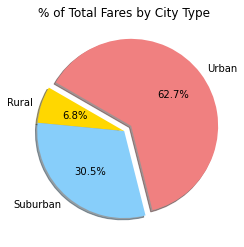

In [20]:
import matplotlib as mpl
#Fare % by city type to save average per city type
total_fares = pyber_data_df["fare"].sum()
print(f"Total fare generated {total_fares}")

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

# Calculate the percentage of fare for each city type.
city_type_percents = 100 * sum_fares_by_type / total_fares
city_type_percents
expode_data = [0,0,0.1]
plt.pie(city_type_percents, labels=["Rural", "Suburban", "Urban"], explode=expode_data,colors=["gold", "lightskyblue", "lightcoral"],
    autopct='%1.1f%%',
    shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

Total Rides for all ciies 2375


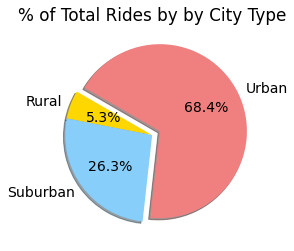

In [22]:
import matplotlib as mpl
#Ride % by city type to save average per city type
total_rides = pyber_data_df["ride_id"].count()
print(f"Total Rides for all ciies {total_rides}")

sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

# Calculate the percentage of fare for each city type.
city_type_percents = 100 * sum_rides_by_type / total_rides
city_type_percents
expode_data = [0,0,0.1]


Total Drivers for all ciies 2973


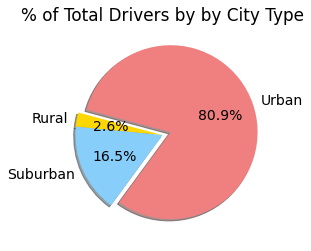

In [31]:
import matplotlib as mpl
# % total drivers per city type
total_drivers = city_data_df["driver_count"].sum()
print(f"Total Drivers for all ciies {total_drivers}")

sum_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers_by_type

# Calculate the percentage of drivers for each city type.
driver_percents = 100 * sum_drivers_by_type / total_drivers
driver_percents

plt.pie(driver_percents, labels=["Rural", "Suburban", "Urban"], explode=expode_data,colors=["gold", "lightskyblue", "lightcoral"],
    autopct='%1.1f%%',
    shadow=True, startangle=165)

plt.title("% of Total Drivers by by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()
